In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Font and fontsize
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Grid
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.grid'] = True

# Background color
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'gainsboro'
plt.rcParams['savefig.facecolor'] = 'white'

# Legend background color
plt.rcParams['legend.facecolor'] = 'white'

In [19]:
main_path = '/Users/nielsaugustdavidsen/Documents/Data/era5'

In [20]:
t2m = xr.open_dataset(main_path + '/era5_1940_temperature_2m.nc')
geo = xr.open_dataset(main_path + '/era5_1940_geo500hpa.nc')
mslp = xr.open_dataset(main_path +'/era5_1940_mean_sea_level_pressure.nc')
t850 = xr.open_dataset(main_path + '/era5_1940_temperature_850hPa.nc')
prec = xr.open_dataset(main_path + '/era5_1940_total_precipitation.nc')


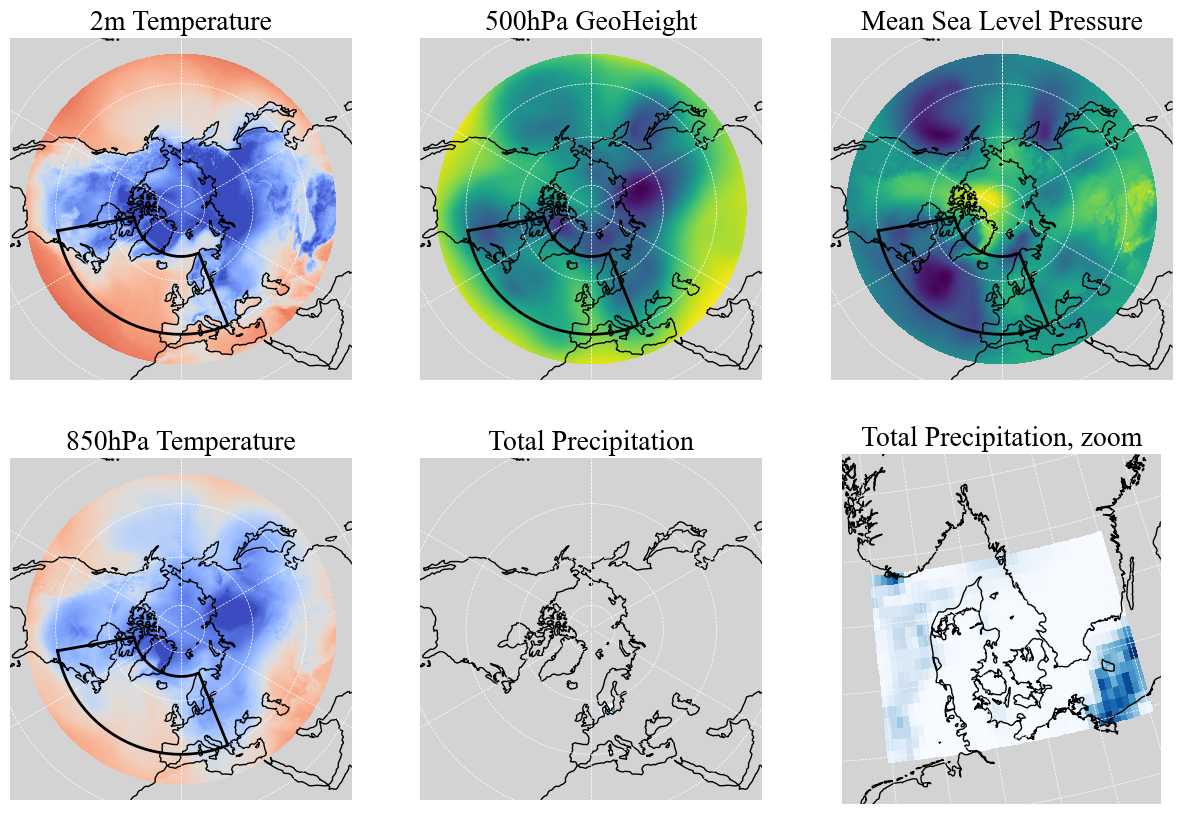

In [21]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(15, 10), subplot_kw={'projection': ccrs.NorthPolarStereo()})

for ax in axs.flatten():
    ax.coastlines()
    # ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.gridlines(color='white', linestyle='--')
    ax.set_facecolor('lightgrey')
    ax.set_extent([-180, 180, 25, 90], ccrs.PlateCarree())
    # Remove Ax edges
    ax.spines['geo'].set_visible(False)

# Define corners
lat_min, lat_max = 40, 70
lon_min, lon_max = -80, 22

# Number of points per side
n_points = 100

# Build each side with more points
bottom_lons = np.linspace(lon_min, lon_max, n_points)
bottom_lats = np.full_like(bottom_lons, lat_min)

right_lats = np.linspace(lat_min, lat_max, n_points)
right_lons = np.full_like(right_lats, lon_max)

top_lons = np.linspace(lon_max, lon_min, n_points)
top_lats = np.full_like(top_lons, lat_max)

left_lats = np.linspace(lat_max, lat_min, n_points)
left_lons = np.full_like(left_lats, lon_min)

# Concatenate full loop
lons = np.concatenate([bottom_lons, right_lons, top_lons, left_lons])
lats = np.concatenate([bottom_lats, right_lats, top_lats, left_lats])

# Plot the smooth square on selected subplots
for ax in axs.flatten()[:-2]:
    ax.plot(lons, lats, transform=ccrs.PlateCarree(), color='black', linewidth=2)


# Plotting the data
axs[0, 0].set_title('2m Temperature')
axs[0, 0].pcolormesh(t2m.longitude, t2m.latitude, t2m.t2m[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto', vmin = 273-30, vmax = 273+30)

axs[0, 1].set_title('500hPa GeoHeight')
axs[0, 1].pcolormesh(geo.longitude, geo.latitude, geo.z.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[0, 2].set_title('Mean Sea Level Pressure')
axs[0, 2].pcolormesh(mslp.longitude, mslp.latitude, mslp.msl[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[1, 0].set_title('850hPa Temperature')
axs[1, 0].pcolormesh(t850.longitude, t850.latitude, t850.t.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto',vmin = 273-30, vmax = 273+30)
axs[1, 1].set_title('Total Precipitation')
axs[1, 1].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

axs[1, 2].set_title('Total Precipitation, zoom')
axs[1, 2].set_extent([5, 16, 53, 60], ccrs.PlateCarree())
axs[1, 2].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

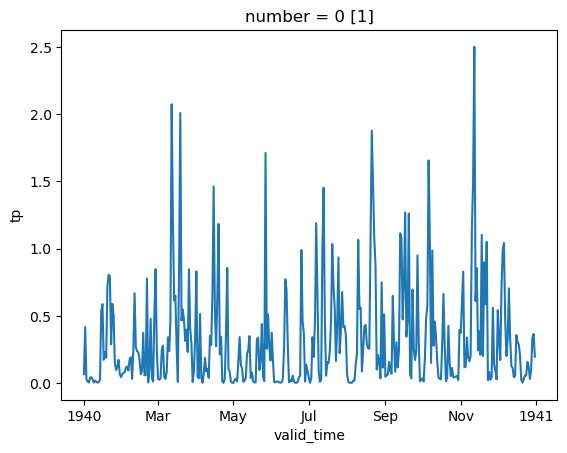

In [7]:
##make a precipt mean
prec_mean = prec.tp.mean(dim = ['longitude', 'latitude'])*1e3*4
prec_mean.plot()

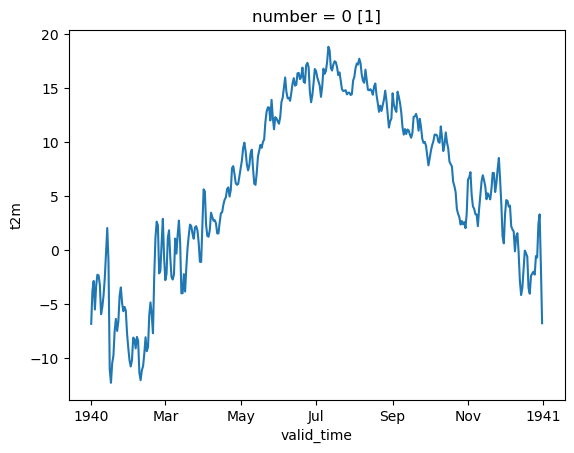

In [8]:
temp_mean = t2m['t2m'].sel(longitude=slice(5, 16), latitude=slice(60, 53)).mean(dim=['longitude', 'latitude']) - 273.15
temp_mean.plot()

(array([62., 38., 21., 19., 15.,  7., 17., 11.,  7., 14.,  9., 11.,  6.,
        14.,  8.,  4.,  6.,  3., 10.,  4.,  5.,  4.,  3.,  5.,  2.,  2.,
         4.,  4.,  5.,  1.,  1.,  2.,  1.,  4.,  3.,  2.,  0.,  2.,  0.,
         4.,  0.,  3.,  3.,  2.,  2.,  1.,  0.,  2.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.02503711, 0.05007422, 0.07511133, 0.10014844,
        0.12518555, 0.15022266, 0.17525977, 0.20029688, 0.22533399,
        0.2503711 , 0.27540821, 0.30044532, 0.32548243, 0.35051954,
        0.37555665, 0.40059376, 0.42563087, 0.45066798, 0.47570509,
        0.5007422 , 0.52577931, 0.55081642, 0.57585353, 0.60089064,
        0.62592775, 0.65096486, 0.67600197, 0.70103908, 0.72607619,
        0.7511133 , 0.7761

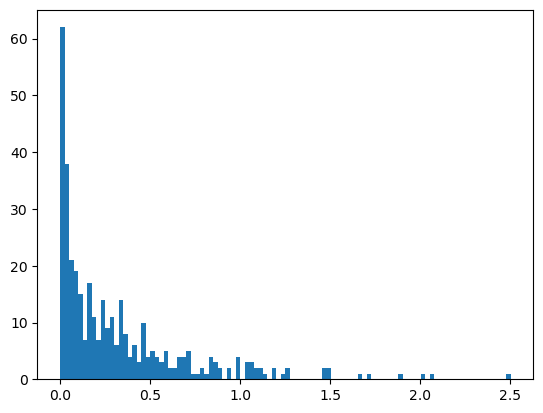

In [10]:
plt.hist(prec_mean.values, bins = 100)

(array([10.,  2.,  4.,  7.,  3., 10., 10., 11., 16., 27., 20., 23., 25.,
        37., 46., 39., 32., 29., 10.,  5.]),
 array([-6.90775537, -6.51645899, -6.1251626 , -5.73386574, -5.34256935,
        -4.95127296, -4.55997658, -4.16868019, -3.7773838 , -3.38608742,
        -2.99479103, -2.60349464, -2.21219778, -1.82090139, -1.42960501,
        -1.03830862, -0.64701223, -0.25571585,  0.13558054,  0.52687693,
         0.91817331]),
 <BarContainer object of 20 artists>)

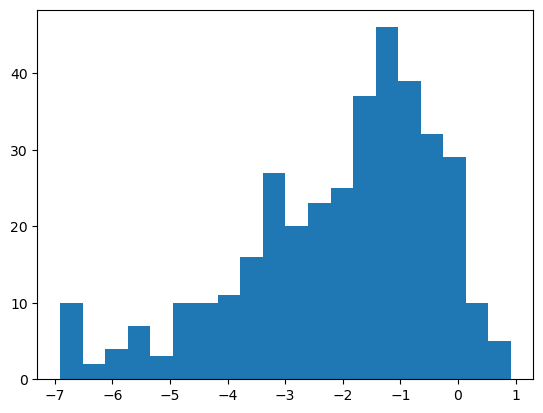

In [14]:
plt.hist(np.log(prec_mean.values + 0.001), bins = 20)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Set default plot parameters ----
# Font and fontsize
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Grid
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes.grid'] = True

# Background color
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'gainsboro'
plt.rcParams['savefig.facecolor'] = 'white'

# Legend background color
plt.rcParams['legend.facecolor'] = 'white'

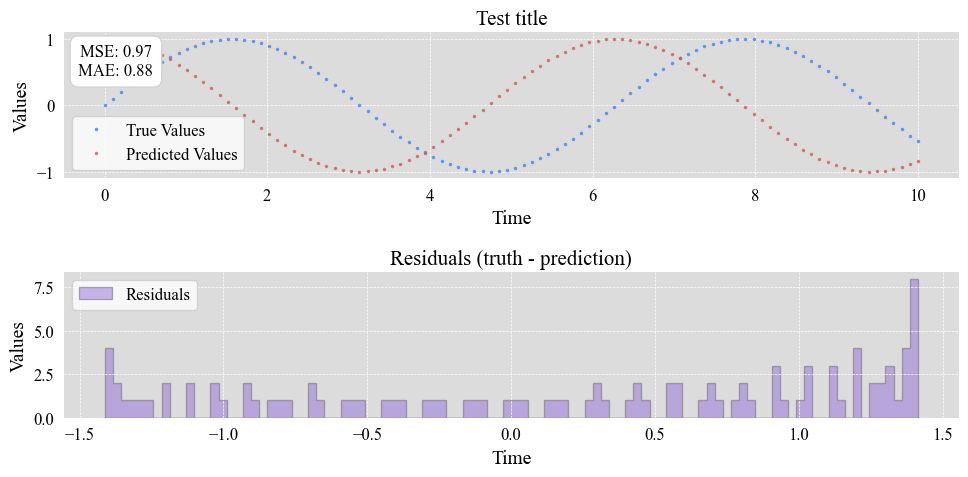

In [3]:
t = np.linspace(0, 10, 100)
dummy1 = np.sin(t)
dummy2 = np.cos(t)

save_name = None
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Standard plot
ax[0].plot(t, dummy1, label='True Values', color='cornflowerblue', ls='', marker='.', markersize=3)
ax[0].plot(t, dummy2 , label='Predicted Values', color='indianred', ls='', marker='.', markersize=3, alpha=0.7)   
mse = np.mean((dummy1 - dummy2)**2)
mae = np.mean(np.abs(dummy1 - dummy2))

bbox_props = dict(boxstyle='round', facecolor='white', alpha=1, pad=0.5, edgecolor='lightgrey')


ax[0].text(0.058, 0.8, f'MSE: {mse:.2f}\nMAE: {mae:.2f}', 
           transform=ax[0].transAxes, fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=bbox_props)
ax[0].set_title('Test title', fontsize=15)


# Residual plot
residuals = dummy1 - dummy2
ax[1].hist(residuals, label='Residuals', color='mediumpurple', alpha=0.5, bins=100, histtype='stepfilled', edgecolor='dimgrey')
ax[1].set_title('Residuals (truth - prediction)', fontsize=15)

spine_args = ['top', 'right', 'left', 'bottom']
for a in ax:
   a.legend()
   a.set_xlabel('Time')
   a.set_ylabel('Values')
   a.set_facecolor('gainsboro')
   for args in spine_args:
       a.spines[args].set_visible(False)

   # Remove ticks
   a.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
   


plt.tight_layout()
if save_name is not None:
   plt.savefig(save_name)




     

(-0.1, 1.1)

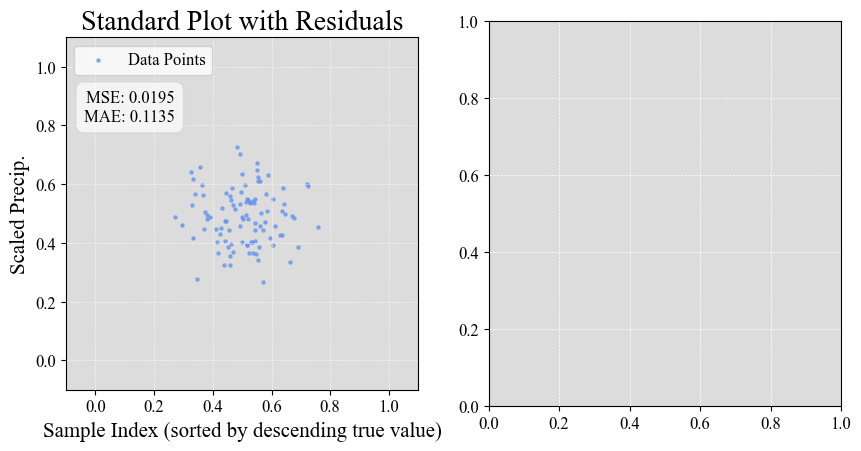

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].set_aspect('equal', adjustable='box')

ax_title = 'Standard Plot with Residuals'
y_true = np.random.normal(0.5, 0.1, size=100)
y_pred = np.random.normal(0.5, 0.1, size=100)

mse = np.mean((y_true - y_pred)**2)
mae = np.mean(np.abs(y_true - y_pred))

ax[0].scatter(y_true, y_pred, label='Data Points', color='cornflowerblue', s=5, alpha=0.7)

bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.7, pad=0.5, edgecolor='lightgrey')
ax[0].text(0.31, 0.85, f'MSE: {mse:.4f}\nMAE: {mae:.4f}',
           transform=ax[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right',
           bbox=bbox_props)
ax[0].set_title(ax_title, fontsize=20)
ax[0].set_xlabel('Sample Index (sorted by descending true value)', fontsize=15)
ax[0].set_ylabel('Scaled Precip.', fontsize=15)
ax[0].grid(True, linestyle='--', alpha=0.7, axis='both', color='white')
ax[0].legend(fontsize=12, loc='upper left')
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlim(-0.1, 1.1)